# Plotting for AR 

The project is to plot different asssets like Sticks, BlueDrums, RedDrums

In [104]:
import pandas as pd  ##pandas is dataframe (data cleaning add new clumns, clean the columns)
import numpy as np ## nUmpy is an array
import matplotlib.pyplot as plt ##visualisation
import seaborn as sns ##also for visualisation (better looking)
import json

sns.set()

#### Loading data from JSON

In [105]:

with open('ms1609025.json') as f:
    data = json.load(f)
    
print ("The data is ", data.keys())

The data is  dict_keys(['UserName', 'CorrectMoves', 'Feedback', 'markerEvents', 'moves'])


In [108]:
moves = data['moves']

Method to convert Unix to Datetime

In [107]:
### simple code to convert unix into datetime
from datetime import datetime
ts = int("1603701785")

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2020-10-26 08:43:05


In [7]:
len(moves) ## len tells the number of elements in that variable

10

#### Plot for all moves
The following code is used to plot for all the 8 moves together.

In [110]:
##To plot for all moves together
bludrumposition = pd.DataFrame()
RedDrumPositions = pd.DataFrame()
StickPositions = pd.DataFrame()

for pos in range(len(moves)):
    
    bludrumposition = bludrumposition.append(pd.DataFrame(moves[pos]['BlueDrumPositions']))
    RedDrumPositions = RedDrumPositions.append(pd.DataFrame(moves[pos]['RedDrumPositions']))
    StickPositions = StickPositions.append(pd.DataFrame(moves[pos]['StickPositions']))
    
bludrumposition.reset_index(drop=True, inplace=True)
RedDrumPositions.reset_index(drop=True, inplace=True)
StickPositions.reset_index(drop=True, inplace=True)

In [118]:
StickPositions

,corr_time,x,y,z
0,0.138,-1.490000,0.000000,-0.013000
1,0.143,-1.490000,0.000000,-0.013000
2,0.164,-1.490000,0.000000,-0.013000
3,0.197,-1.490000,0.000000,-0.013000
4,0.231,-1.490000,0.000000,-0.013000
...,...,...,...,...
1479,76.578,0.628591,-1.010340,4.594260
1480,76.611,0.598923,-1.012431,4.552535
1481,76.645,0.575113,-1.001750,4.524353
1482,76.678,0.538717,-1.008595,4.501482


#### Plot for just one move
The number of move `num_move` = 0

In [136]:
num_move = 0
StickPositions = pd.DataFrame(moves[num_move]['StickPositions'])
RedDrumPositions = pd.DataFrame(moves[num_move]['RedDrumPositions'])
bludrumposition = pd.DataFrame(moves[num_move]['BlueDrumPositions'])

In [142]:
StickPositions

,corr_time,x,y,z
0,0.138,-1.490000,0.000000,-0.013000
1,0.143,-1.490000,0.000000,-0.013000
2,0.164,-1.490000,0.000000,-0.013000
3,0.197,-1.490000,0.000000,-0.013000
4,0.231,-1.490000,0.000000,-0.013000
...,...,...,...,...
217,7.347,0.364966,-1.153557,4.313080
218,7.380,0.368511,-1.183940,4.371044
219,7.414,0.386295,-1.197218,4.421756
208,7.450,0.449195,-0.864699,3.824955


In [139]:
def txtsplit(x):
    """
    Splitting the coordinates into seperate x,y,z columns
    """
    return x.split(",")[0], x.split(",")[1], x.split(",")[2]

bludrumposition['x'], bludrumposition['y'], bludrumposition['z'] = zip(*bludrumposition['position'].map(txtsplit))
RedDrumPositions['x'], RedDrumPositions['y'], RedDrumPositions['z'] = zip(*RedDrumPositions['position'].map(txtsplit))
StickPositions['x'], StickPositions['y'], StickPositions['z'] = zip(*StickPositions['position'].map(txtsplit))

In [140]:
def time_correction(df):
    """The first time will be the referrence point till the end of the move"""
    
    df['corr_time'] = df['time'].apply(lambda x : float(x)  - int(df.loc[0,'time'].split(".")[0]))
    return df

def clean_df(df):
    """remove the position and old time columns"""
    df.drop(labels = ['position', 'time'], axis=1, inplace=True) ##removes positiona nd time column
    df.sort_values(by=['corr_time'], inplace=True) ##sort the df w.r.t time
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('float32')
    return df[[ 'corr_time','x', 'y', 'z']]

In [141]:
bludrumposition = clean_df(time_correction(bludrumposition))
RedDrumPositions = clean_df(time_correction(RedDrumPositions))
StickPositions = clean_df(time_correction(StickPositions))

#### Calculating the distance between two points in 3d
We will use the euclidean distance formula here

In [ ]:
coord1 = [x,y,z]
coord2 = [x,y,z]

In [119]:
def distance(coord1, coord2):
    """
    the distance between two points
    """
    d = 0
    for i in range(1,4):
        d = d + (coord1[i] - coord2[i])**2
        
    d= d**0.5
    return d
    

In [128]:
# StickPositions
bludrumposition.head(1)
# RedDrumPositions

,corr_time,x,y,z
0,0.138,1.150916,0.084453,4.843122


In [133]:
df_distance = pd.DataFrame(columns=['time','distance_BD_ST', 'distance_RD_ST', 'distance_RD_BD'])

for (_,p),(_,q),(_,r) in zip(StickPositions.iterrows(), bludrumposition.iterrows(), RedDrumPositions.iterrows()):
#     print (p,q,r, sep= "\n--------------\n")
    df_distance.loc[_,'time'] = StickPositions.loc[_,'corr_time']
    df_distance.loc[_,'distance_BD_ST'] = distance(tuple(p.to_list()), tuple(q.to_list()))
    df_distance.loc[_,'distance_RD_ST'] = distance(tuple(p.to_list()), tuple(r.to_list()))
    df_distance.loc[_,'distance_RD_BD'] = distance(tuple(q.to_list()), tuple(r.to_list()))


In [135]:
# df_distance

Plotting a line plot for distance vs Time

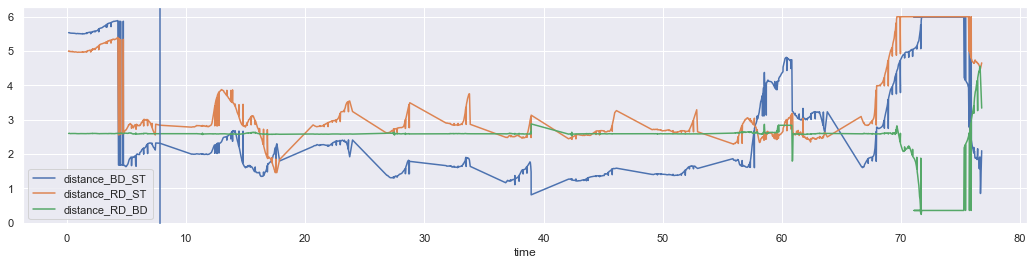

In [143]:
df_distance.set_index(keys=['time']).plot(figsize=(18,4));
plt.axvline(7.8)

In [24]:
StickPositions.head(2)

,corr_time,x,y,z
0,0.138,-1.49,0.0,-0.013
1,0.143,-1.49,0.0,-0.013


In [25]:
bludrumposition.head(2)

,corr_time,x,y,z
0,0.138,1.150916,0.084453,4.843122
1,0.143,1.149783,0.094054,4.845031
